#  numpy et le broadcasting

Ce TP est un prolongement des TPs suivants, que l'on conseil de revoir si besoin.

* [01-numpy](https://drive.google.com/file/d/15zJKHEYZKyBvRHs7GDEDr1MaLQkphjwt/view?usp=sharing)

* [02-plot](https://drive.google.com/file/d/1oP95E8EqJzvp_-FUzHEkqR-_GoH5NKG2/view?usp=sharing)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Broadcasting





### c'est quoi ?  

Le broadcasting, c'est le fait de faire des opérations entre tenseurs de shape différentes. C'est une opération que l'on fait naturellement en math, par exemple quand on écrit:
$$
w[i,j] =  mat[i,j] \, vec[j]
$$



In [ ]:
mat=np.array([[1,2],[-1,-2]])
vec=np.array([1,2])
print(mat)
print(vec)

In [ ]:
"w[i,j]=mat[i,j]*vec[j]"
w=mat*vec[None,:]
#ou bien: w=mat*vec[np.newaxis,:]
w

Le `np.newaxis` permet de lever l'ambiguité car on aurait pu aussi vouloir écrire

    w[i,j]=mat[i,j]*vec[i]


En fait, `np.newaxis` permet d'ajouter une dimension à un vecteur. Par exemple

* `vec[np.newaxis,:]` est une matrice ligne
* `vec[:,np.newaxis]` est une matrice colonne






Multiplication matrice*vecteur:

In [ ]:
"w[i,j]=mat[i,j]*vec[j]"
w=mat*vec[np.newaxis,:]
"sum_j mat[i,j]*vec[j]"
print(np.sum(w,axis=1))

Multiplication vecteur*matrice:

In [ ]:
"w[i,j]=mat[i,j]*vec[i]"
w=mat*vec[:,np.newaxis]
"sum_i mat[i,j]*vec[i]"
print(np.sum(w,axis=0))

Notons que l'on peut simplement effectuer le produit matriciel avec l'opérateur `@`:

In [ ]:
print("mat@vec:", mat@vec)
print("vec@mat:", vec@mat)

### Tenseurs compatibles

Pour pouvoir faire une opération entre deux tenseurs, il faut que leur shape soit compatibles. Par exemple considérons deux tenseurs de dimension 3:

    tenseur_a.shape=(s0,s1,s2)
    tenseur_b.shape=(t0,t1,t2)

l'opération entre ces 2 tenseurs est possibles quand pour tout $i\in\{0,1,2\}$ on a:

* ou bien $s_i = t_i$
* ou bien $s_i \neq t_i$ mais l'un des deux vaut 1.

Par exemple cela fonctionne pour:

    tenseur_a.shape=(3,4,1)
    tenseur_b.shape=(3,1,6)


Quand $s_i \neq t_i$, l'indice présent qu'une seule fois est tout simplement répété dans l'opération. Dans l'exemple précédent



    (tenseur_a+tenseur_b)[i,j,k] = tenseur_a[i,j,0]+tenseur_b[i,0,k]


et ceci pour:
$$
\forall i \in\{0,1,2\}, \forall j \in\{0,1,2,5\},\forall k \in\{0,1,2,3,4,5\}:
$$

On voit qu'il n'y a aucune ambiguité.




### Ajouter des dimensions

In [2]:
a=np.array([0,1,2,3])
a=a[:,np.newaxis]
print(a)
print("shape=",a.shape)

[[0]
 [1]
 [2]
 [3]]
shape= (4, 1)


In [3]:
b=np.array([0,10,100])
b=b[np.newaxis,:]
print(b)
print("shape=",b.shape)

[[  0  10 100]]
shape= (1, 3)


In [4]:
#a_i*b_j
a*b

array([[  0,   0,   0],
       [  0,  10, 100],
       [  0,  20, 200],
       [  0,  30, 300]])

En fait le `np.newaxis` peut être simplement remplacer par un `None`.

Voici par exemple une multiplication matricielles par paquet: `A` est un paquet de 10 matrices $3\times 5$ et `B` est un paquet de 10 matrices $5\times 4$.

In [ ]:
A=np.random.uniform(low=0,high=1,size=[10,3,5])
B=np.random.uniform(low=0,high=1,size=[10,5,4])
"""
Je conseille dans un premier temps de toujours mettre ce commentaires:
AB[i,j,l]= sum_k A[i,j,k]*B[i,k,l]
"""
AB=np.sum(A[:,:,:,None]*B[:,None,:,:],axis=2)#None=np.newaxis
AB.shape

### Ajouts d'axe automatique

In [ ]:
S=np.ones(shape=[3,4])
T=np.linspace(0,1,4)
S.shape,T.shape

In [ ]:
ST=S*T #implicitement:T=T[None,:]
ST.shape

In [ ]:
ST

***A vous:*** A partir de cet exemple, déduisez quelle opération tente numpy quand on fait des opérations entre tenseurs de dimension différentes.

## Exo: mélange de cloche

### Une mélange de gaussienne

Voici comment construire une gaussienne

In [ ]:
x=np.linspace(-1,11,300)
mu=1
sigma=0.5
gauss=np.exp(-0.5*(x-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma)
gauss.shape

In [ ]:
plt.plot(x,gauss);

Voici comme construire 5 gaussiennes d'un coup

In [ ]:
np.random.seed(42)
nb_cloche=5
x=np.linspace(-1,11,300)
x_=x[None,:]
mu=np.random.uniform(1,9,size=[nb_cloche,1])
sigma=np.random.uniform(0.1,0.2,size=[nb_cloche,1])
gauss=np.exp(-0.5*(x_-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma)
gauss.shape

In [ ]:
fig,axs=plt.subplots(5,1,sharex="all",sharey="all")
for i in range(5):
    axs[i].


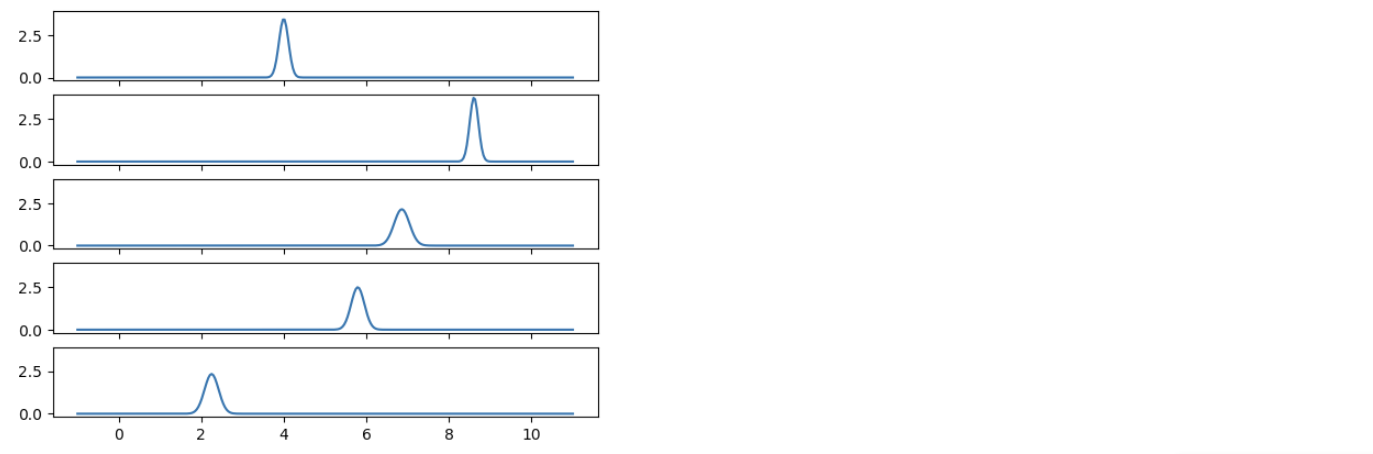

Et voici comment produire un mélange de gaussienne

In [ ]:
melange=np.sum(gauss,axis=0)
plt.plot(x,melange);

### Par batch

Modifions ce programme pour définir un paquet (batch) de mélange de gaussienne.  Il nous suffit pour cela d'ajouter un axe au début.




#### →♡♡♡

In [ ]:
np.random.seed(42)

batch_size=3
nb_cloche=5
x=np.linspace(-1,11,300)
x_=x[
mu=np.random.uniform(1,9,size=
sigma=np.random.uniform(0.1,0.2,size=
gauss=np.exp(-0.5*(x_-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma)
gauss.shape

In [ ]:
melange=np.sum(gauss,axis=1)
melange.shape

In [ ]:
fig,axs=plt.subplots(3,1)
for i in range(3):
    axs[i].plot(x,melange[i]);

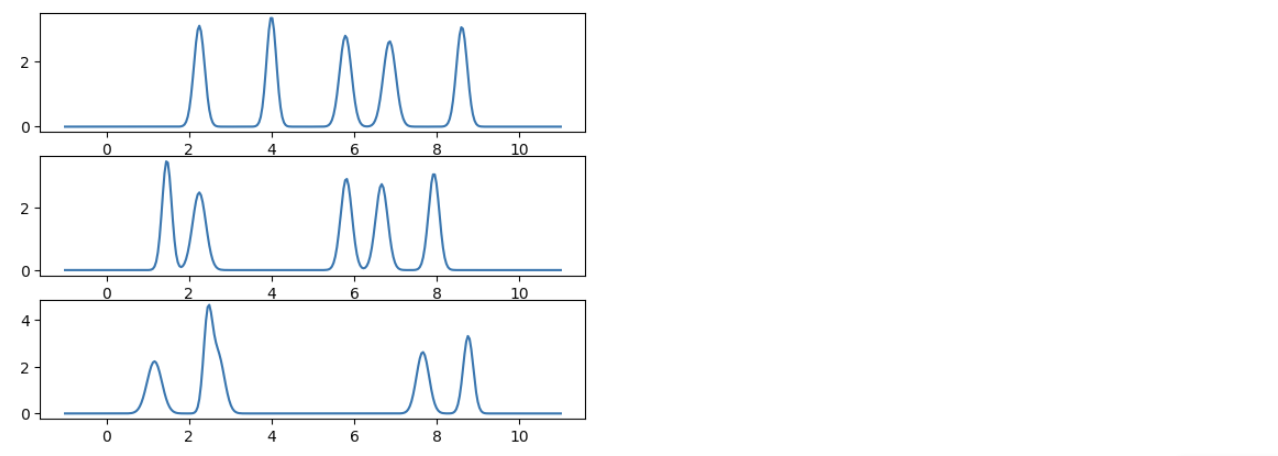

### Avec un nombre de cloche variable

Reprennons ce programme pour que le différents mélanges apparaissant dans le paquet n'aient pas tous le même nombre de bosse. Aide: utilisons pour cela un tenseurs constitué de 0 et de 1.

#### →♡♡♡♡

In [ ]:
np.random.seed(422)
batch_size=3
nb_cloche=7
x=np.linspace(-1,11,300)
x_=x[
mu=np.random.uniform(1,9,size=
mask=np.random.choice(a=[0,1],p=[0.8,0.2],size=
mask

    array([[[1],
            [0],
            [0],
            [0],
            [1],
            [0],
            [0]],

        [[0],
            [0],
            [0],
            [0],
            [0],
            [0],
            [0]],

        [[0],
            [1],
            [0],
            [0],
            [0],
            [0],
            [0]]])

In [ ]:
sigma=np.random.uniform(0.1,0.2,size=

gauss=np.exp(-0.5*(x_-mu)**2/sigma**2)/(np.sqrt(2*np.pi)*sigma)*mask
gauss.shape

    (3, 7, 300)

In [ ]:
melange=np.sum(gauss,axis=1)
melange.shape

    (3, 300)

In [ ]:
fig,axs=plt.subplots(batch_size,1,figsize=(8,batch_size),sharex="all",sharey="all")
for i in range(batch_size):
    axs[i].plot(x,melange[i]);

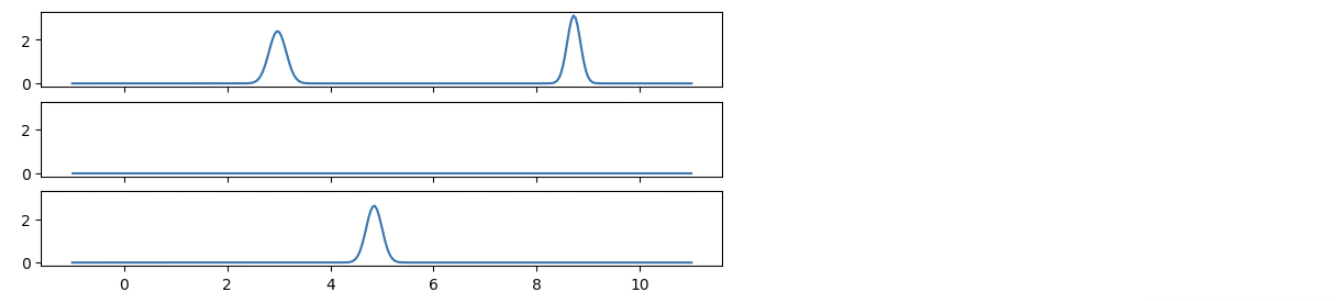

Essayez de modifier quelque chose dans le programme pour obtenir un truc comme ceci:

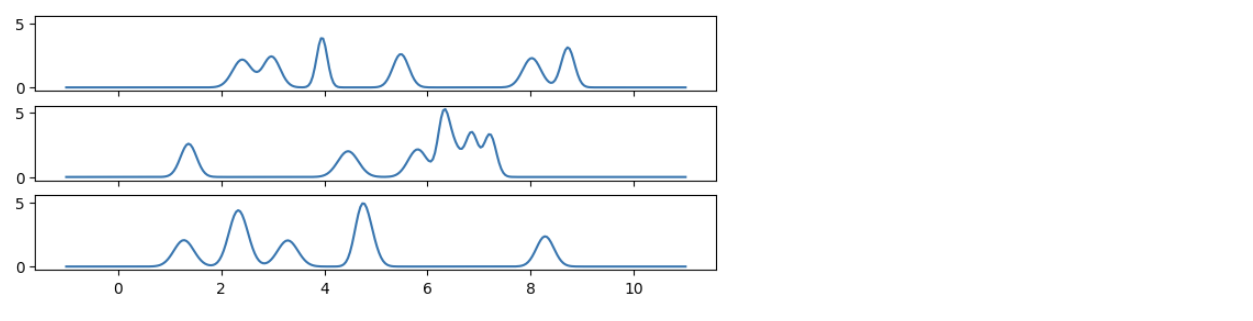

## Exo: Une fonction en 4D

Les tenseurs 4d sont omniprésent en deeplearning. Le défis ici est de représenter graphiquement une fonction de 4 variable, via un tenseur 4d.

####→♡♡♡♡

On considère 4 variables `a0`,`a1`,`a2`,`a3` prenant leur valeur dans l'intervalle [0,2].

On considère la fonction suivante:

In [ ]:
def fun(a0,a1,a2,a3):
    return (a0-1)**2*a1*np.cos(5*a2*a3)

On va en faire la représentation graphique suivante:
* Chaque ligne correspond à une valeur de `a0` donnée
* Chaque colonne correspond à une valeur de `a1` donnée
* Quand `a0,a1` sont fixés, la petite image représente l'application `a2,a3->F(a0,a1,a2,a3)`

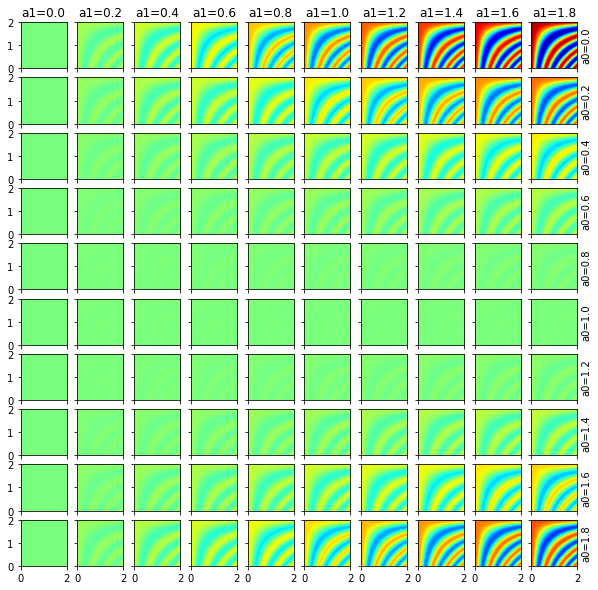

Voici la définition des variables.  

In [ ]:
nb=20#nombre de points de discrétisation
#on en prend peu pour aller vite. Quand tout marche, refaite tourner avec nb=50
a0=np.linspace(0,2,nb)
a1=np.linspace(0,2,nb)
a2=np.linspace(0,2,nb)
a3=np.linspace(0,2,nb)

Le tenseur des valeurs:

In [ ]:
val=fun(
val.shape

    (20, 20, 20, 20)

C'est naturellement un tenseur de dimension 4. Pour que l'échelle des couleur soit la même sur tous les axs, on a besoin de la valeur max et min du tenseur de valeurs.

In [ ]:
vmin=np.min(val)
vmax=np.max(val)
vmin,vmax

    (-1.9999578097674804, 2.0)

In [ ]:
#on ne sélectionne que quelques a0,a1 à afficher
a0_choosen_index=range(0,nb,5)
a1_choosen_index=range(0,nb,5)
a0_choosen=a0[a0_choosen_index]
a1_choosen=a1[a1_choosen_index]

a0_choosen

    array([0.        , 0.52631579, 1.05263158, 1.57894737])

In [ ]:
fig,axs=plt.subplots(len(a0_choosen_index),len(a1_choosen_index),sharex="all",sharey="all",figsize=(10,10))

for i,a0_ in enumerate(a0_choosen_index):
    for j,a1_ in enumerate(a1_choosen_index):
        axs[i,j].imshow(
        #n'oubliez pas d'utiliser vmin et vmax

        if j==len(a0_choosen_index)-1:
            axs[i,j].set_ylabel(f"a0={a0_choosen[i]:.1f}")
            axs[i,j].yaxis.set_label_position("right")
        if i==0:
            axs[i,j].set_title(f"a1={a1_choosen[j]:.1f}")

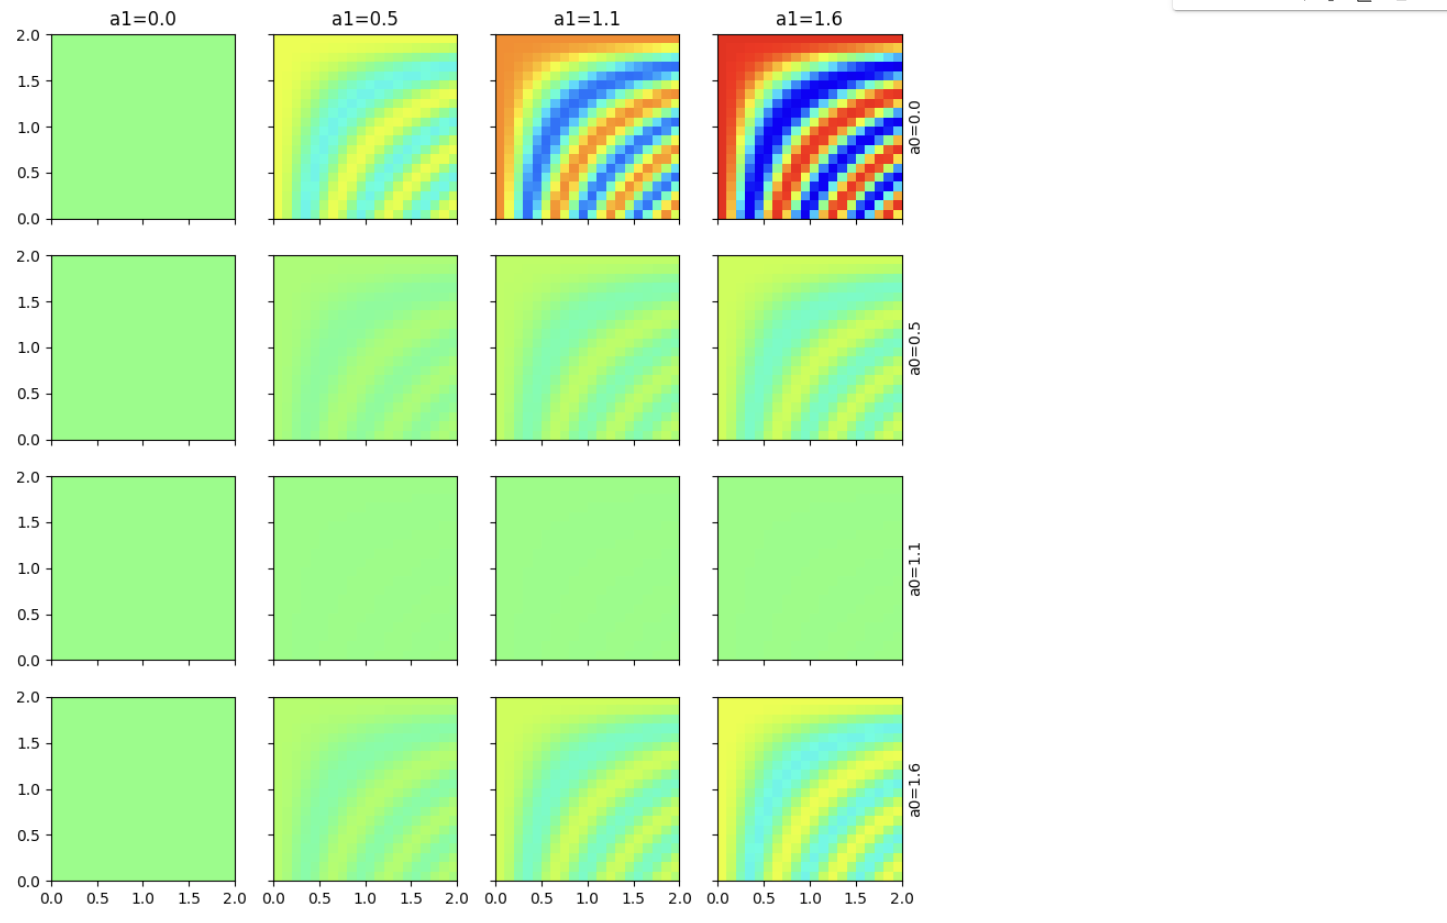

Refaites tourner le programme avec `nb=50` pour obtenir une figure plus jolie (celle proposée au début de l'exo). Attention c'est un peu long.